# 確率ロボティクスレポート
## 課題
適当なタイルワールドを作って、そのなかでのエージェントの動きを強化学習のアルゴリズムを使って生成してください。

# エージェントの定義

In [1]:
class Agent:
    def __init__(self):
        self.actions = ["up","down","left","right"]
        self.pos = (0,0)
        
agent = Agent()

# 環境の定義
ペナルティを与えるマス(unk)を追加

授業で扱った池が二つある環境

In [2]:
size = 16

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 10.0
        self.best_action = "up"
        self.goal = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] =0.0
        self.goal = True
        
    def set_unk(self,actions):
        for a in actions:
            self.Q[a] += 100000.0
        
        
        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
states[14][14].set_goal(agent.actions)


for i in range(6):
    for j in range(6):
        states[i+3][j+6].set_unk(agent.actions)
        
for i in range(5):
    for j in range(5):
        states[i+7][j+3].set_unk(agent.actions)



# 描画

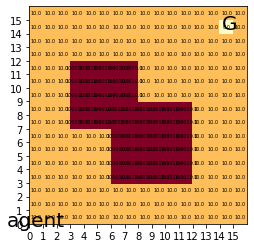

In [3]:
import matplotlib.pyplot as plt  
import matplotlib.patches as patches
#import matplotlib.animation as animation


def draw(mark_pos):
    fig, ax = plt.subplots()
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size)] for i in range(size)]
    mp = ax.pcolor(values, cmap=plt.cm.YlOrRd,vmin=0,vmax=30)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
    
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[y][x]
            plt.text(x+0.5,y+0.5,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=5)
            if states[y][x].goal:
                plt.text(x+0.75,y+0.75,"G",ha = 'center', va = 'center', size=20)
                
    plt.text(agent.pos[0]+0.5,agent.pos[1]+0.25,"agent",ha = 'center', va = 'center', size=20)
    
    if mark_pos == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[y][x].goal: continue
                plt.text(x+0.5,y+0.25,states[y][x].best_action,ha = 'center', va = 'center', size=10)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0]+0.5,mark_pos[1]+0.25,s.best_action,ha = 'center', va = 'center', size=10)
            
    plt.show()
    fig.clear()
    
draw(None)

# 状態遷移の実装

In [4]:
import random

def state_transition(s_pos,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "up": x += 1
    elif a == "down": x -= 1
    elif a == "right": y += 1
    elif a == "left": y -= 1
        
    if x < 0:       x = 0
    elif x >= size: x = size-1
    if y < 0:       y = 0
    elif y >= size: y = size-1
        
    return (x,y)

# 方策(ε-greedy)

In [5]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: #10%でランダムに
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

# ある状態で最大のqを返す関数

In [6]:
def max_a(s):
    best_a = None
    best_q = 1000000000
    for a in s.Q:
        if best_q > s.Q[a]:
            best_q = s.Q[a]
            best_a = a
    s.best_action = best_a
    return best_a

# 学習
sarsaの学習部分をQ学習用に変更

良い感じのところで止めて次に進んでください

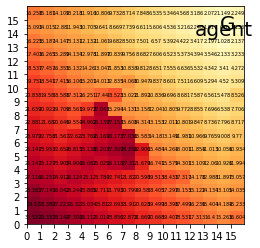

In [73]:
alpha = 0.2
gamma = 1.0

def sarsa(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = max_a(s_next)#次の状態で一番良いaで学習
    #a_next = e_greedy(s_next)#次の状態で選んだaで学習
    
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next])
    #print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
    #print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size),random.randrange(size))
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    while True:
        #draw(None)
        s_next, a_next, q = sarsa(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
            
            
for i in range(1000):
    one_trial()
draw(None)

#plt.show()

# ロボットの移動軌跡の描画

(4, 5) down
(3, 5) down
(2, 5) right
(2, 6) right
(2, 7) right
(2, 8) right
(2, 9) right
(2, 9) right
(2, 10) right
(2, 11) right
(2, 12) up
(2, 12) up
(2, 12) up
(3, 12) up
(4, 12) right
(4, 13) up
(5, 13) right
(5, 14) up
(6, 14) up
(7, 14) up
(8, 14) up
(8, 14) up
(9, 14) up
(10, 14) up
(11, 14) up
(11, 14) up
(11, 14) up
(12, 14) up
(13, 14) up
(14, 14) up


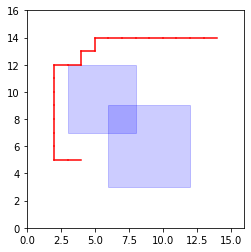

In [74]:
def demo_play():
    agent.pos = (random.randrange(size),random.randrange(size))
    a = states[agent.pos[1]][agent.pos[0]].best_action
    #描画系
    demo = plt.subplot()
    demo.set_xlim([0,16])
    demo.set_ylim([0,16])
    r = patches.Rectangle(xy=(3, 7), width=5, height=5, color=(0,0,1,0.2))
    demo.add_patch(r)
    r = patches.Rectangle(xy=(6, 3), width=6, height=6, color=(0,0,1,0.2))
    demo.add_patch(r)
    #demo.plot(agent.pos[0],agent.pos[1],marker='.')
    demo.set_aspect('equal')
    
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
          
    for i in range(100):
        #draw(None)
        #s_next, a_next, q = sarsa(agent.pos,a)
        #states[agent.pos[0]][agent.pos[1]].Q[a] = q
        s_next = state_transition(agent.pos,a)
        demo.plot([agent.pos[0],s_next[0]],[s_next[1],agent.pos[1]],color="red")
        agent.pos = s_next
        
        #a = states[agent.pos[1]][agent.pos[0]].best_action
        a = max_a(states[agent.pos[0]][agent.pos[1]])
        print(agent.pos,a)
        #a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
            
demo_play()
